In [1]:
import os

import kagglehub
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
directory_path = kagglehub.dataset_download(
    "tanishqdublish/text-classification-documentation"
)
csv_file_path = os.path.join(directory_path, "df_file.csv")

In [3]:
df = pd.read_csv(csv_file_path)
df.head

<bound method NDFrame.head of                                                    Text  Label
0     Budget to set scene for election\n \n Gordon B...      0
1     Army chiefs in regiments decision\n \n Militar...      0
2     Howard denies split over ID cards\n \n Michael...      0
3     Observers to monitor UK election\n \n Minister...      0
4     Kilroy names election seat target\n \n Ex-chat...      0
...                                                 ...    ...
2220  India opens skies to competition\n \n India wi...      4
2221  Yukos bankruptcy 'not US matter'\n \n Russian ...      4
2222  Survey confirms property slowdown\n \n Governm...      4
2223  High fuel prices hit BA's profits\n \n British...      4
2224  US trade gap hits record in 2004\n \n The gap ...      4

[2225 rows x 2 columns]>

In [4]:
df.columns

Index(['Text', 'Label'], dtype='object')

In [5]:
print(df["Text"][0])

Budget to set scene for election
 
 Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.
 
 Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.
 
 - Increase in the stamp duty threshold from Â£60,000 
  - A freeze on petrol duty 
  - An extension of tax credit scheme for poorer families 
  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chanc

In [6]:
print("Length of first 10 text in the dataset:")
for i in range(10):
    print(len(df["Text"][i]))

Length of first 10 text in the dataset:
3147
3026
3167
3094
2614
2792
2899
2394
3002
2152


In [7]:
print("Number of words in first 10 text in the dataset:")
for i in range(10):
    print(len(df["Text"][i].strip().split(" ")))

Number of words in first 10 text in the dataset:
550
504
547
502
445
468
461
404
520
340


## Check for Duplicates

In [15]:
has_duplicates = df.duplicated(subset=["Text"]).any()
print(has_duplicates)

True


In [14]:
duplicates = df[df.duplicated(subset=["Text"])]
print(duplicates)

                                                   Text  Label
59    Blair backs 'pre-election budget'\n \n Tony Bl...      0
155   'Debate needed' on donations cap\n \n A cap on...      0
186   Howard denies split over ID cards\n \n Michael...      0
216   Kennedy questions trust of Blair\n \n Lib Dem ...      0
226   Fox attacks Blair's Tory 'lies'\n \n Tony Blai...      0
...                                                 ...    ...
1954  S Korea spending boost to economy\n \n South K...      4
1992  Jobs growth still slow in the US\n \n The US c...      4
2105  Steady job growth continues in US\n \n The US ...      4
2186  SEC to rethink post-Enron rules\n \n The US st...      4
2211  Economy 'strong' in election year\n \n UK busi...      4

[98 rows x 2 columns]


In [ ]:
df.drop_duplicates(subset=["Text"], inplace=True)

## Check for NaNs

In [21]:
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)

Text     0
Label    0
dtype: int64


## Class distribution

Label Mapping:

- **Politics**: `0`
- **Sport**: `1`
- **Technology**: `2`
- **Entertainment**: `3`
- **Business**: `4`

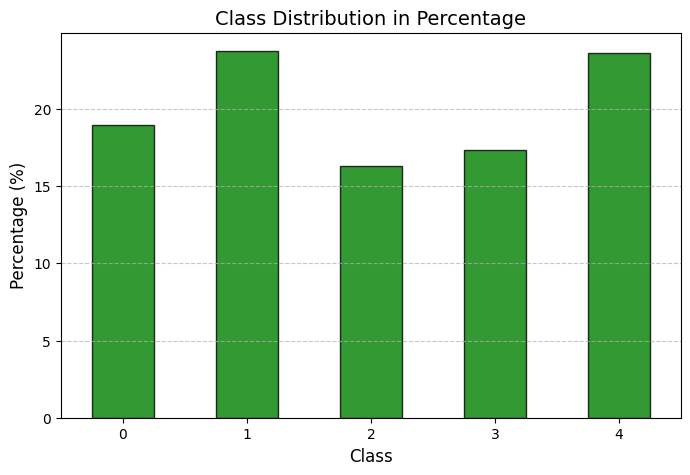

In [18]:
label_counts = df["Label"].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
label_counts.sort_index().plot(kind="bar", color="green", alpha=0.8, edgecolor="black")
plt.title("Class Distribution in Percentage", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [19]:
print("Class distribution in percentage: \n", label_counts)

Class distribution in percentage: 
 Label
1    23.742360
4    23.648331
0    18.946874
3    17.348378
2    16.314057
Name: proportion, dtype: float64
